In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

In [4]:
annthyroid = pd.read_csv(r"C:\Users\purav\OneDrive\Desktop\Comparative Evaluation of Anomaly Detection Algorithms\Comparative-Evaluation-of-Anomaly-Detection-Algorithms\Datasets\annthyroid-unsupervised-ad.csv", header = None)

In [5]:
annthyroid

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.45,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.06100,0.0060,0.023,0.087,0.026,o
1,0.61,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.02900,0.0150,0.061,0.096,0.064,o
2,0.16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.02900,0.0190,0.058,0.103,0.056,o
3,0.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.11400,0.0030,0.024,0.061,0.039,o
4,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.04900,0.0030,0.005,0.116,0.004,o
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6911,0.65,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00047,0.0080,0.154,0.075,0.204,n
6912,0.77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00006,0.0206,0.125,0.107,0.117,n
6913,0.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00130,0.0250,0.125,0.114,0.109,n
6914,0.64,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00078,0.0206,0.106,0.088,0.121,n


In [6]:
shuffled_df = annthyroid.sample(frac=1).reset_index(drop=True)
shuffled_df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.52,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.06200,0.0096,0.00250,0.119,0.00250,o
1,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00110,0.0130,0.13600,0.097,0.14000,n
2,0.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00150,0.0330,0.12200,0.146,0.08300,n
3,0.56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00060,0.0206,0.11700,0.111,0.10500,n
4,0.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00030,0.0208,0.11200,0.099,0.11290,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6911,0.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.00340,0.0190,0.12600,0.116,0.10700,n
6912,0.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00290,0.0201,0.11329,0.096,0.11776,n
6913,0.49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00460,0.0220,0.09200,0.083,0.11100,n
6914,0.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00190,0.0206,0.15200,0.113,0.13500,n


In [7]:
df = pd.DataFrame(shuffled_df.iloc[:, :-1].values)

In [8]:
from sklearn.preprocessing import StandardScaler

In [12]:
ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df))

In [13]:
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.003739,-0.666440,-0.394405,-0.125951,-0.11547,-0.199609,-0.106803,8.298107,7.656415,-0.258756,...,-0.114825,-0.09276,-0.161594,-0.012026,-0.228787,3.592302,-1.414670,-3.080296,1.113700,-3.191056
1,-0.479550,-0.666440,-0.394405,-0.125951,-0.11547,-0.199609,-0.106803,-0.120509,-0.130609,-0.258756,...,-0.114825,-0.09276,-0.161594,-0.012026,-0.228787,-0.142244,-0.960263,0.711841,-0.036583,0.713452
2,-0.743890,-0.666440,-0.394405,-0.125951,-0.11547,-0.199609,-0.106803,-0.120509,-0.130609,-0.258756,...,-0.114825,-0.09276,-0.161594,-0.012026,-0.228787,-0.117715,1.712718,0.314163,2.525411,-0.905144
3,0.207733,-0.666440,-0.394405,-0.125951,-0.11547,-0.199609,-0.106803,-0.120509,-0.130609,-0.258756,...,-0.114825,-0.09276,-0.161594,-0.012026,-0.228787,-0.172905,0.055469,0.172136,0.695415,-0.280423
4,-1.008229,-0.666440,-0.394405,-0.125951,-0.11547,-0.199609,-0.106803,-0.120509,-0.130609,-0.258756,...,-0.114825,-0.09276,-0.161594,-0.012026,-0.228787,-0.191302,0.082199,0.030108,0.067988,-0.056091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6911,1.265092,-0.666440,-0.394405,-0.125951,-0.11547,-0.199609,-0.106803,-0.120509,-0.130609,-0.258756,...,-0.114825,-0.09276,-0.161594,-0.012026,4.370887,-0.001202,-0.158369,0.427785,0.956843,-0.223630
6912,-0.109474,1.500509,-0.394405,-0.125951,-0.11547,-0.199609,-0.106803,-0.120509,-0.130609,-0.258756,...,-0.114825,-0.09276,-0.161594,-0.012026,-0.228787,-0.031863,-0.011355,0.066751,-0.088869,0.081916
6913,-0.162342,-0.666440,-0.394405,-0.125951,-0.11547,-0.199609,-0.106803,-0.120509,-0.130609,-0.258756,...,-0.114825,-0.09276,-0.161594,-0.012026,-0.228787,0.072385,0.242578,-0.538002,-0.768582,-0.110044
6914,0.789280,-0.666440,-0.394405,-0.125951,-0.11547,-0.199609,-0.106803,-0.120509,-0.130609,-0.258756,...,-0.114825,-0.09276,-0.161594,-0.012026,-0.228787,-0.093186,0.055469,1.166329,0.799986,0.571470


In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA()
pca.fit(df)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(num_components)

19


In [16]:
pca = PCA(n_components=19)
new_df = pca.fit_transform(df)

In [17]:
new_df

array([[-4.22890152,  4.00830619,  4.39150327, ..., -1.0287306 ,
         0.87045824,  1.35333726],
       [ 0.38257123, -0.39077691,  0.08421056, ..., -0.08673328,
        -0.51483395,  0.72863673],
       [ 1.42091372,  2.12084109, -0.2882408 , ...,  0.08764145,
        -0.23482513, -0.97912425],
       ...,
       [-0.47265904, -0.08264699, -0.09807473, ..., -0.08835621,
        -0.41930813,  0.72362085],
       [ 1.09051929, -0.2465836 ,  0.38834119, ..., -0.52440776,
         0.39227006, -0.09174347],
       [-2.16923316, -3.58525619, -0.90373408, ...,  0.7733037 ,
         0.21285684,  2.18341463]])

In [18]:
df = pd.DataFrame(new_df)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-4.228902,4.008306,4.391503,-1.235349,-2.137906,1.861809,-3.640856,4.039032,-1.359259,7.217354,-1.578122,-2.136727,1.610505,-1.574222,1.304207,-0.408579,-1.028731,0.870458,1.353337
1,0.382571,-0.390777,0.084211,-0.002902,0.287193,-0.267242,-0.252975,0.017694,0.153064,-0.372826,-0.005814,-0.143751,0.316154,0.328484,-0.208831,-0.184534,-0.086733,-0.514834,0.728637
2,1.420914,2.120841,-0.288241,-0.273538,0.215300,-0.252695,0.397647,0.108126,0.500970,0.118409,-0.587377,-0.405777,0.575174,0.387538,-0.015019,-1.467338,0.087641,-0.234825,-0.979124
3,0.207167,0.448231,0.156912,0.130731,0.194855,-0.349447,0.102598,-0.008130,0.156705,-0.144188,-0.136365,-0.361136,0.445976,0.481792,-0.376866,-0.539895,-0.246933,-0.145803,-0.139549
4,0.227473,0.398349,-0.306265,-0.103727,0.082105,-0.139206,-0.280807,0.033642,0.204555,-0.264086,-0.054714,0.013266,0.269208,0.143760,-0.073530,-0.652971,0.166437,-0.793780,0.536161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6911,0.073003,0.176864,-1.216189,-1.606269,0.042638,-0.682214,0.957293,0.501121,-0.384058,0.051271,-1.683876,0.248408,0.826547,0.242803,-0.892041,1.526890,-3.060883,0.168481,-0.856993
6912,-0.311912,-0.431319,-0.870730,0.061458,-0.091071,0.122657,-0.081807,-0.175582,-0.108557,0.084981,-0.345721,-0.184976,-0.144493,0.049528,0.143957,-0.252702,0.873402,0.674486,-0.263815
6913,-0.472659,-0.082647,-0.098075,0.154069,-0.097524,-0.176014,-0.322929,0.003461,-0.000404,-0.357122,0.084948,-0.012366,0.242258,0.296239,-0.008699,-0.386131,-0.088356,-0.419308,0.723621
6914,1.090519,-0.246584,0.388341,0.209137,0.329695,-0.473289,0.234285,0.021173,0.161987,-0.162192,-0.209013,-0.537203,0.541072,0.722147,-0.273641,-0.361888,-0.524408,0.392270,-0.091743


Base Case of Algorithms

In [19]:
from pyod.models.lof import LOF
from pyod.models.cblof import CBLOF
from pyod.models.cof import COF
from pyod.models.knn import KNN

In [20]:
lof = LOF()
cof = COF()
cblof = CBLOF()
knn = KNN()

In [21]:
lof.fit(df)

LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=20, novelty=True, p=2)

In [22]:
cof.fit(df)

COF(contamination=0.1, method='fast', n_neighbors=20)

In [23]:
knn.fit(df)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [24]:
cblof.fit(df)

c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.1, n_clusters=8, n_jobs=None, random_state=None,
   use_weights=False)

In [25]:
y = shuffled_df.iloc[:,-1]
y = pd.DataFrame(y.replace({'o':1, 'n':0}))

In [26]:
y

,21
0,1
1,0
2,0
3,0
4,0
...,...
6911,0
6912,0
6913,0
6914,0


In [27]:
lof_pred = lof.labels_
lof_scores = lof.decision_scores_

In [28]:
knn_pred = knn.labels_
knn_scores = knn.decision_scores_

In [29]:
cblof_pred = cblof.labels_
cblof_scores = cblof.decision_scores_

In [30]:
cof_pred = cof.labels_
cof_scores = cof.decision_scores_

In [31]:
lof_accuracy = accuracy_score(y,lof_pred)
print(lof_accuracy)

0.8924233661075767


In [32]:
cblof_accuracy = accuracy_score(y,cblof_pred)
print(cblof_accuracy)

0.8791208791208791


In [33]:
cof_accuracy = accuracy_score(y,cof_pred)
print(cof_accuracy)

0.8880855986119144


In [34]:
knn_accuracy = accuracy_score(y,knn_pred)
print(knn_accuracy)

0.8837478311162522


In [35]:
lof_f1 = f1_score(y, lof_pred)
print(f"F1-score: {lof_f1:.2f}")

F1-score: 0.21


In [36]:
roc_auc = roc_auc_score(y, lof_scores)
print(f"ROC AUC: {roc_auc:.2f}")

ROC AUC: 0.79


In [37]:
lof_fpr, lof_tpr, _ = roc_curve(y, lof_scores)


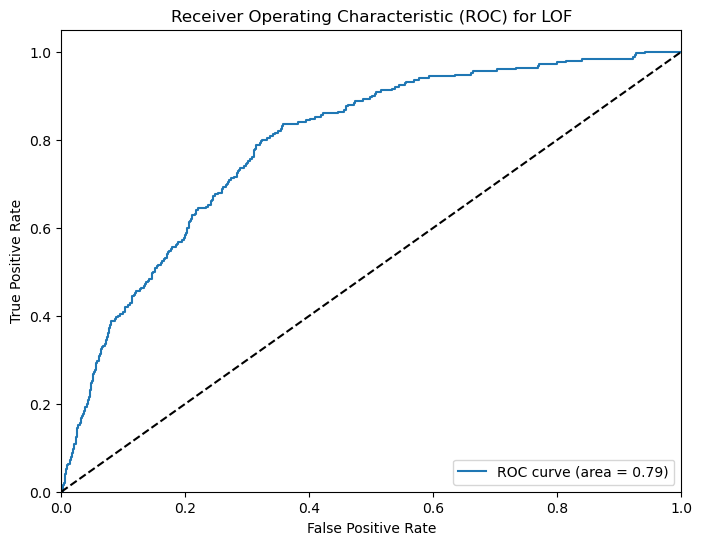

In [38]:
plt.figure(figsize=(8, 6))
plt.plot(lof_fpr, lof_tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for LOF')
plt.legend(loc="lower right")
plt.show()

In [39]:
cblof_accuracy = accuracy_score(y,cblof_pred)
print(cblof_accuracy)

0.8791208791208791


In [40]:
cblof_f1 = f1_score(y,cblof_pred)
print(f"F1: {cblof_f1:.2f}")

F1: 0.11


In [41]:
roc_auc = roc_auc_score(y, cblof_scores)
print(f"ROC AUC: {roc_auc:.2f}")

ROC AUC: 0.60


In [42]:
cblof_fpr, cblof_tpr, _ = roc_curve(y, cblof_scores)

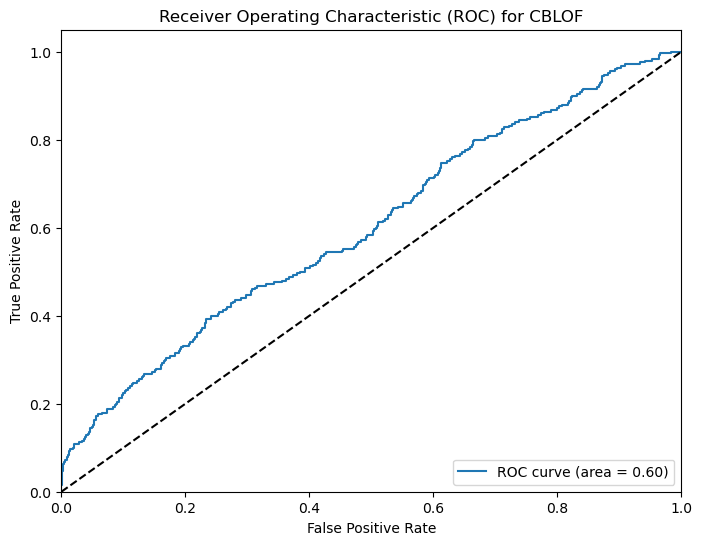

In [43]:
plt.figure(figsize=(8, 6))
plt.plot(cblof_fpr, cblof_tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for CBLOF')
plt.legend(loc="lower right")
plt.show()

In [44]:
knn_accuracy = accuracy_score(y,knn_pred)
print(knn_accuracy)

0.8837478311162522


In [45]:
knn_f1 = f1_score(y,knn_pred)
print(f"F1: {knn_f1:.2f}")

F1: 0.15


In [46]:
roc_auc = roc_auc_score(y, knn_scores)
print(f"ROC AUC: {roc_auc:.2f}")

ROC AUC: 0.74


In [47]:
knn_fpr, knn_tpr, _ = roc_curve(y, knn_scores)


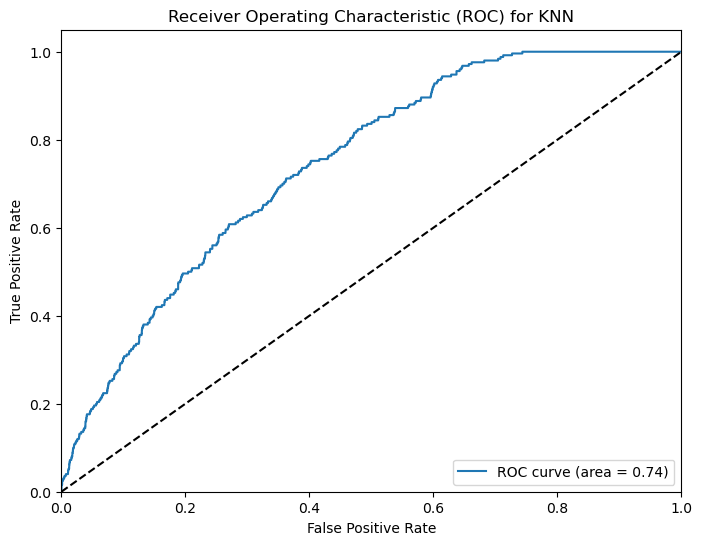

In [48]:
plt.figure(figsize=(8, 6))
plt.plot(knn_fpr, knn_tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for KNN')
plt.legend(loc="lower right")
plt.show()

In [49]:
cof_accuracy = accuracy_score(y,cof_pred)
print(cof_accuracy)

0.8880855986119144


In [50]:
cof_f1 = f1_score(y, cof_pred)
print(f"F1-score: {cof_f1:.2f}")

F1-score: 0.18


In [51]:
roc_auc = roc_auc_score(y, cof_scores)
print(f"ROC AUC: {roc_auc:.2f}")

ROC AUC: 0.78


In [52]:
cof_fpr, cof_tpr, _ = roc_curve(y, cof_scores)


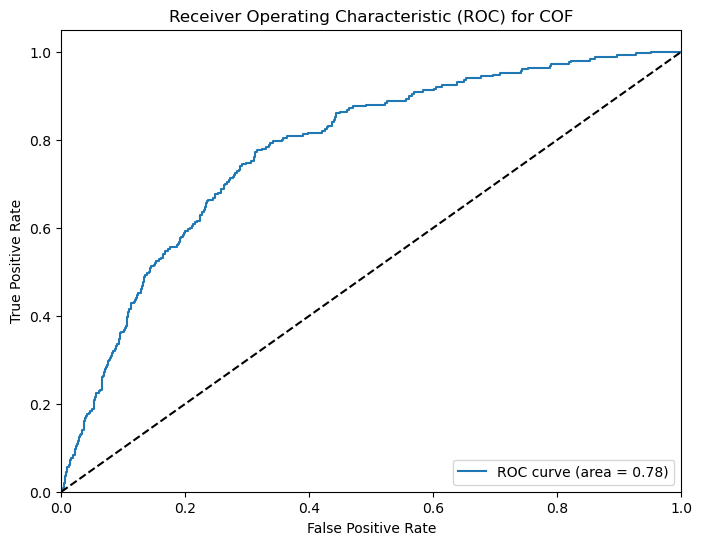

In [53]:
plt.figure(figsize=(8, 6))
plt.plot(cof_fpr, cof_tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for COF')
plt.legend(loc="lower right")
plt.show()

Performance over multiple parameters

c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

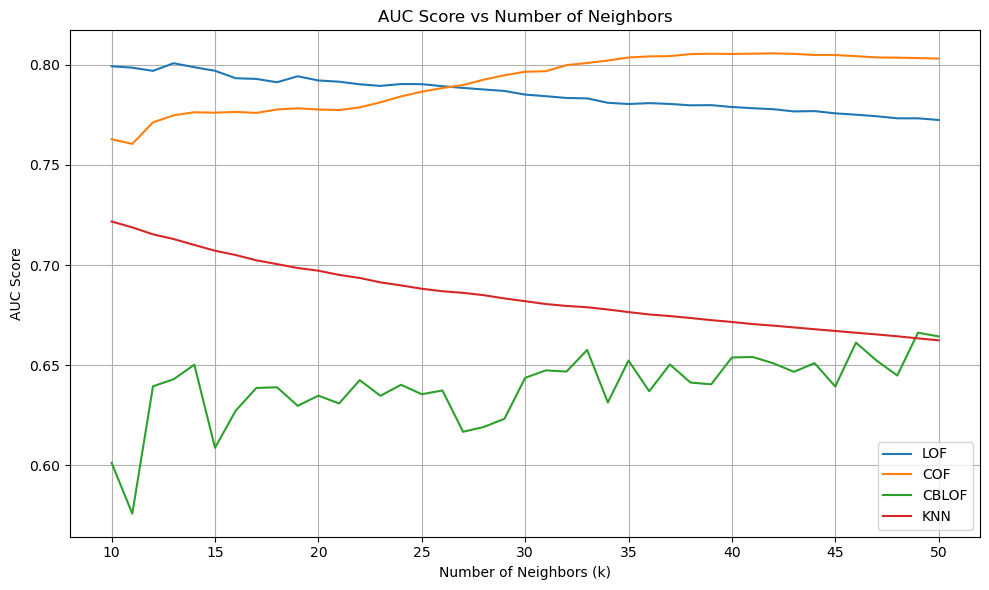

In [54]:
auc_scores_lof = []
auc_scores_cblof = []
auc_scores_knn = []
auc_scores_cof = []
n_neighbors_list = list(range(10, 51))

# Evaluate AUC scores for LOF, CBLOF, and KNN over multiple neighbors
for n_neighbors in n_neighbors_list:
    # LOF
    lof_model = LOF(n_neighbors=n_neighbors)
    lof_model.fit(df)
    y_scores_lof = lof_model.decision_function(df)
    auc_lof = roc_auc_score(y, y_scores_lof)
    auc_scores_lof.append(auc_lof)

    cof_model = COF(n_neighbors=n_neighbors)
    cof_model.fit(df)
    y_scores_cof = cof_model.decision_function(df)
    auc_cof = roc_auc_score(y, y_scores_cof)
    auc_scores_cof.append(auc_cof)

    # CBLOF
    cblof_model = CBLOF(n_clusters=n_neighbors)
    cblof_model.fit(df)
    y_scores_cblof = cblof_model.decision_function(df)
    auc_cblof = roc_auc_score(y, y_scores_cblof)
    auc_scores_cblof.append(auc_cblof)
    
    # KNN
    knn_model = KNN(n_neighbors=n_neighbors)
    knn_model.fit(df)
    y_scores_knn = knn_model.decision_function(df)
    auc_knn = roc_auc_score(y, y_scores_knn)
    auc_scores_knn.append(auc_knn)

# Calculate mean AUC score for each model
mean_auc_lof = np.mean(auc_scores_lof)
mean_auc_cblof = np.mean(auc_scores_cblof)
mean_auc_knn = np.mean(auc_scores_knn)
mean_auc_cof = np.mean(auc_scores_cof)

plt.figure(figsize=(10, 6))

# Plot LOF AUC
plt.plot(n_neighbors_list, auc_scores_lof, label='LOF')

plt.plot(n_neighbors_list, auc_scores_cof, label='COF')
# Plot CBLOF AUC
plt.plot(n_neighbors_list, auc_scores_cblof, label='CBLOF')

# Plot KNN AUC
plt.plot(n_neighbors_list, auc_scores_knn, label='KNN')

# Add labels and title
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('AUC Score')
plt.title('AUC Score vs Number of Neighbors')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()